<a href="https://colab.research.google.com/github/mobarakol/computer_vision_tutorial/blob/main/camera_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Camera Calibration:
src: https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html<br>
src2 & asset: https://github.com/jagracar/OpenCV-python-tests/tree/master/OpenCV-tutorials/cameraCalibration 

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1BLuf-sIYPNau-XZU1H0OIViPYQ_nlk_p'
gdown.download(url,'calib_images.zip',quiet=True) 
!unzip -q calib_images.zip 


url = 'https://drive.google.com/uc?id=1CWU7P4K-CBsPvSKQZTo79MCfoOL3vSZK'
gdown.download(url,'chess_img.zip',quiet=True) 
!unzip -q chess_img.zip 

Calibration: Example1:

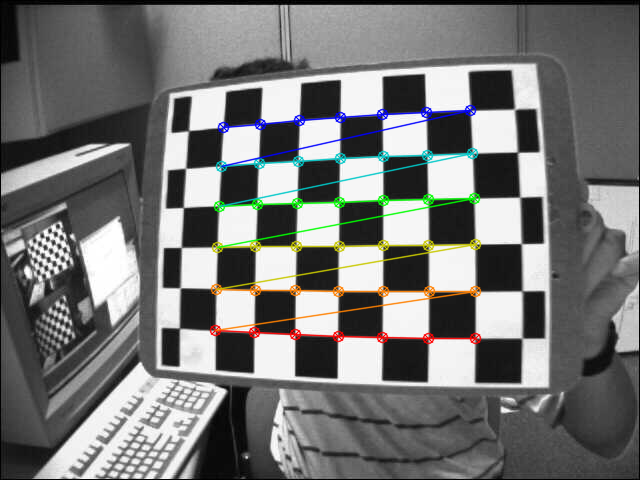

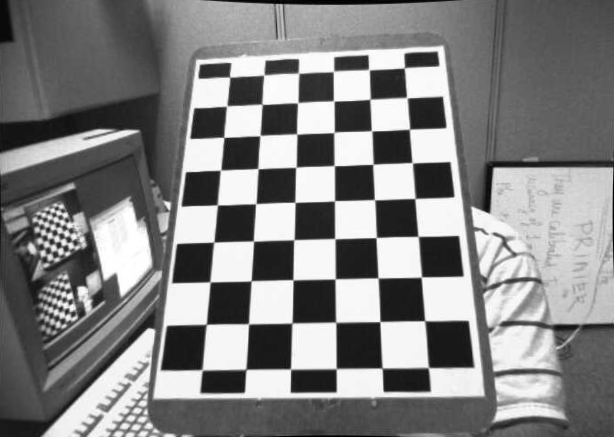

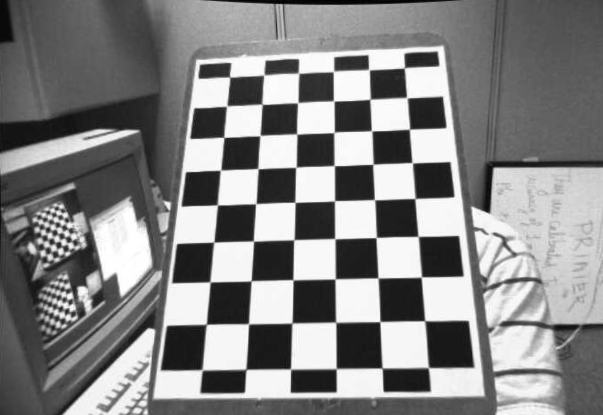

In [ ]:
import numpy as np
import cv2 as cv
import glob
from google.colab.patches import cv2_imshow

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('chess_img/*.jpg')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)

cv2_imshow(img)

ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

img = cv.imread('chess_img/left12.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2_imshow(dst)

# undistort
mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2_imshow(dst)

Calibration: Example2:

True
True
True
True


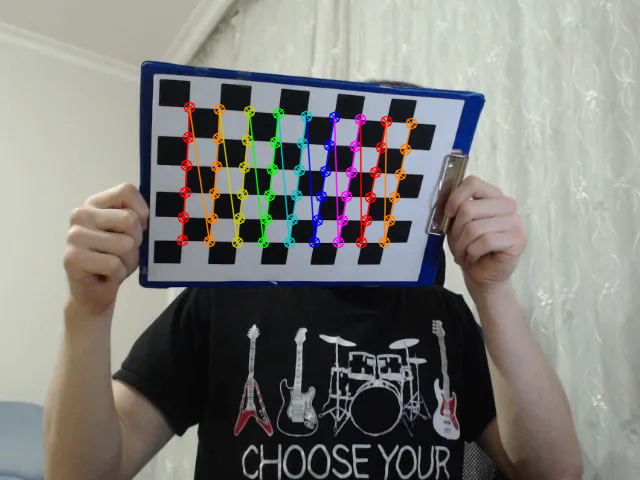

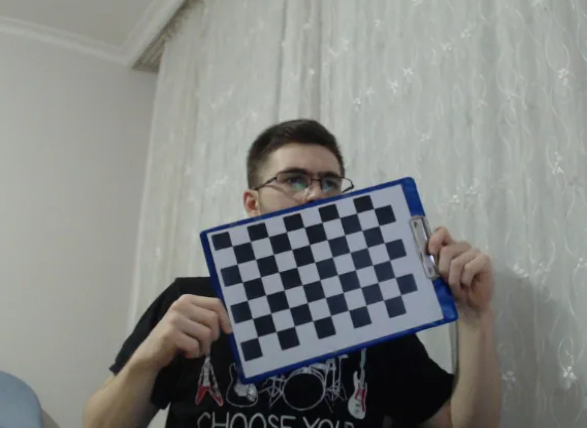

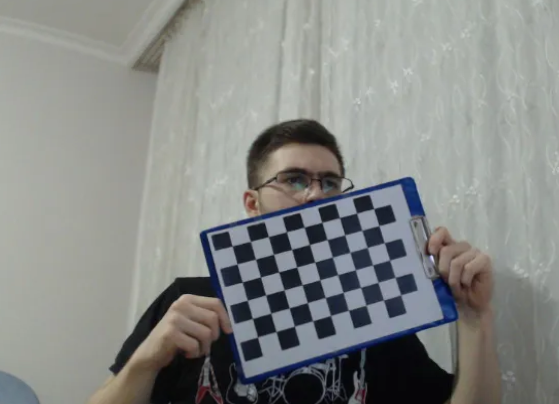

In [ ]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:9].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('calib_images/*.png')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (6,9), None)
    # success, corners = cv2.findChessboardCorners(gray, (nY, nX), None)
    # If found, add object points, image points (after refining them)
    if ret == True:      
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (6,9), corners2, ret)
        # cv2_imshow(img)

cv2_imshow(img)
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

img = cv.imread('calib_images/4.png')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2_imshow(dst)

# undistort
mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2_imshow(dst)

Find Chess Corner: Another example

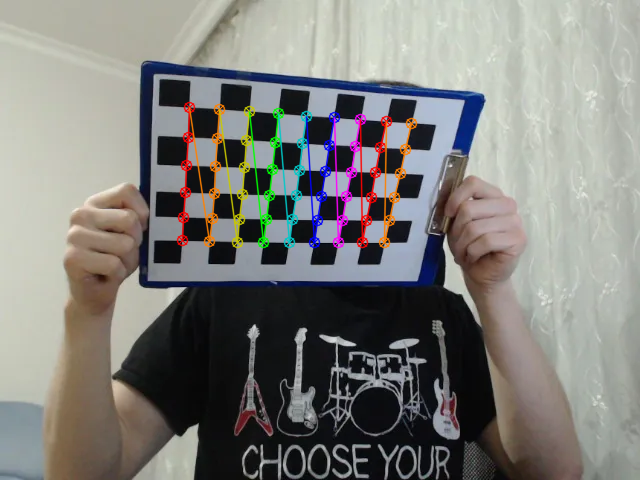

In [ ]:
import numpy as np
import cv2 as cv
import cv2
import glob
import matplotlib.pyplot as plt


# Chessboard dimensions
number_of_squares_X = 10 # Number of chessboard squares along the x-axis
number_of_squares_Y = 7  # Number of chessboard squares along the y-axis
nX = number_of_squares_X - 1 # Number of interior corners along x-axis
nY = number_of_squares_Y - 1 # Number of interior corners along y-axis

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('calib_images/*.png')
for fname in images:
  image = cv2.imread(fname)
  # Convert the image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
 
  # Find the corners on the chessboard
  success, corners = cv2.findChessboardCorners(gray, (nY, nX), None)
  if success == True:
    # Draw the corners
    cv2.drawChessboardCorners(image, (nY, nX), corners, success)

    # Create the output file name by removing the '.jpg' part
    new_filename = '_drawn_corners.jpg'     
      
    # Save the new image in the working directory
    cv2.imwrite(new_filename, image)

    # Display the image 
cv2_imshow(image) 


Another Calibration Example

In [ ]:
import numpy as np
import cv2
import glob
import argparse

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


def calibrate(dirpath, image_format, square_size, width=9, height=6):
    """ Apply camera calibration operation for images in the given directory path. """
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,6,0)
    objp = np.zeros((height*width, 3), np.float32)
    objp[:, :2] = np.mgrid[0:width, 0:height].T.reshape(-1, 2)

    objp = objp * square_size

    # Arrays to store object points and image points from all the images.
    objpoints = []  # 3d point in real world space
    imgpoints = []  # 2d points in image plane.

    if dirpath[-1:] == '/':
        dirpath = dirpath[:-1]

    images = glob.glob(dirpath+'/*.' + image_format)

    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chess board corners
        ret, corners = cv2.findChessboardCorners(gray, (width, height), None)

        # If found, add object points, image points (after refining them)
        if ret:
            objpoints.append(objp)

            corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
            imgpoints.append(corners2)

            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (width, height), corners2, ret)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    return [ret, mtx, dist, rvecs, tvecs]


if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='Camera calibration')
    parser.add_argument('--image_dir', type=str, default='calib_images', help='image directory path')
    parser.add_argument('--image_format', type=str, default='png',  help='image format, png/jpg')
    parser.add_argument('--square_size', type=float, default=0.015, help='chessboard square size')
    parser.add_argument('--width', type=int, default=9, help='chessboard width size, default is 9')
    parser.add_argument('--height', type=int, default=6, help='chessboard height size, default is 6')
    parser.add_argument('--save_file', type=str, default='', help='YML file to save calibration matrices')

    args = parser.parse_args([])
    ret, mtx, dist, rvecs, tvecs = calibrate(args.image_dir, args.image_format, args.square_size, args.width, args.height)
    print("Calibration Parameters:\nret:", ret)
    print('mtx:\n', mtx)
    print('dist:\n', dist)
    print('rvecs:\n', rvecs)
    print('tvecs:\n', tvecs)


Calibration Parameters:
ret: 0.2626000325177854
mtx:
 [[603.88076524   0.         325.02507427]
 [  0.         603.85810275 235.61863369]
 [  0.           0.           1.        ]]
dist:
 [[ 1.75781836e-01 -1.33272039e+00 -4.90881051e-03  1.65134529e-03
   4.72222730e+00]]
rvecs:
 (array([[-0.07460881],
       [-0.33137697],
       [ 0.1157703 ]]), array([[-0.14203751],
       [-0.15683467],
       [-0.27042753]]), array([[0.16267041],
       [0.41073505],
       [0.06455739]]), array([[ 0.48503344],
       [-0.30748665],
       [ 0.08251095]]))
tvecs:
 (array([[-0.08439634],
       [-0.06443941],
       [ 0.31430026]]), array([[-0.05066305],
       [ 0.02933752],
       [ 0.49347997]]), array([[-0.0169785 ],
       [-0.03505966],
       [ 0.31543291]]), array([[-0.06670967],
       [-0.06266798],
       [ 0.29779606]]))
